In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications import imagenet_utils
from tensorflow.keras.models import Model
from sklearn.metrics import confusion_matrix

import itertools
import os
import shutil
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# creating train, valid, test data for each of the 9 numbers signs

os.chdir('E:/Python/libraries/KERAS/Data/Hand-signs')
if os.path.isdir('train/0/') is False:
    os.mkdir('train')
    os.mkdir('valid')
    os.mkdir('test')
    
    for i in range(0,10):
        shutil.move(f'{i}', 'train')
        os.mkdir(f'valid/{i}')
        os.mkdir(f'test/{i}')
        
        samples_valid = random.sample(os.listdir(f'train/{i}'), 30)
        
        for j in samples_valid:
            shutil.move(f'train/{i}/{j}', f'valid/{i}')
            
        samples_test = random.sample(os.listdir(f'train/{i}'), 5)
        
        for k in samples_test:
            shutil.move(f'train/{i}/{k}', f'test/{i}')
os.chdir('../../..')

In [3]:
# preprocess the data
path_train = 'E:/Python/libraries/KERAS/Data/Hand-signs/train'
path_valid = 'E:/Python/libraries/KERAS/Data/Hand-signs/valid'
path_test = 'E:/Python/libraries/KERAS/Data/Hand-signs/test'

In [4]:
batches_train = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
directory = path_train, target_size = (224,224), batch_size = 10)
batches_valid = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
directory = path_valid, target_size = (224,224), batch_size = 10)
batches_test = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
directory = path_test, target_size = (224,224), batch_size = 10, shuffle = False)


Found 1712 images belonging to 10 classes.
Found 300 images belonging to 10 classes.
Found 50 images belonging to 10 classes.


In [5]:
# Load the model
mobile_model = tf.keras.applications.mobilenet.MobileNet()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [12]:
mobile_model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32

In [6]:
# altering the model
temp = mobile_model.layers[-6].output
output = Dense(units=10, activation='softmax')(temp)

In [7]:
new_model = Model(inputs = mobile_model.input, outputs = output)

In [8]:
a = 0
for layer in new_model.layers:
    a=a+1
print(a)
# number of total layers including input layer

89


In [8]:
for layer in new_model.layers[:-23]:
    layer.trainable = False

In [20]:
new_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128   

In [9]:
new_model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [10]:
new_model.fit(x = batches_train, validation_data  = batches_valid, epochs = 30, verbose = 2)

Epoch 1/30
Epoch 1/30
172/172 - 393s - loss: 0.8630 - acc: 0.7506 - val_loss: 1.5112 - val_acc: 0.5533
Epoch 2/30
Epoch 1/30
172/172 - 377s - loss: 0.1833 - acc: 0.9661 - val_loss: 0.9310 - val_acc: 0.7033
Epoch 3/30
Epoch 1/30
172/172 - 378s - loss: 0.1018 - acc: 0.9854 - val_loss: 0.9969 - val_acc: 0.6133
Epoch 4/30
Epoch 1/30
172/172 - 377s - loss: 0.0593 - acc: 0.9953 - val_loss: 0.7325 - val_acc: 0.7300
Epoch 5/30
Epoch 1/30
172/172 - 377s - loss: 0.0334 - acc: 0.9982 - val_loss: 0.6154 - val_acc: 0.7933
Epoch 6/30
Epoch 1/30
172/172 - 380s - loss: 0.0254 - acc: 0.9988 - val_loss: 0.6136 - val_acc: 0.7800
Epoch 7/30
Epoch 1/30
172/172 - 378s - loss: 0.0211 - acc: 0.9994 - val_loss: 0.5842 - val_acc: 0.7967
Epoch 8/30
Epoch 1/30
172/172 - 377s - loss: 0.0170 - acc: 0.9994 - val_loss: 0.4907 - val_acc: 0.8467
Epoch 9/30
Epoch 1/30
172/172 - 377s - loss: 0.0104 - acc: 1.0000 - val_loss: 0.4514 - val_acc: 0.8533
Epoch 10/30
Epoch 1/30
172/172 - 376s - loss: 0.0168 - acc: 0.9971 - val_

extra fine tuning can be done by changing any hyperparameters and running more epochs.

In [11]:
labels_test = batches_test.classes

In [12]:
predictions = new_model.predict(x = batches_test, verbose=0)

In [13]:
cm = confusion_matrix(y_true = labels_test, y_pred = predictions.argmax(axis=1))

In [14]:
batches_test.class_indices

{'0': 0,
 '1': 1,
 '2': 2,
 '3': 3,
 '4': 4,
 '5': 5,
 '6': 6,
 '7': 7,
 '8': 8,
 '9': 9}

In [16]:
def plot_confusion_matrix(cm, classes,
                         normalize=False,
                         title='Confusion matrix',
                         cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix. 
    Normalization can be applied by setting 'normalize=True'.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm = cm.astype('float')/cm.sum(axis=1)[:, np.newaxis]
        print("Normalized Confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    
    print(cm)
    
    thresh = cm.max()/2.0
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j,i,cm[i,j],
                 horizontalalignment="center",
                 color="white" if cm[i,j] > thresh else "black")
    
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[5 0 0 0 0 0 0 0 0 0]
 [0 5 0 0 0 0 0 0 0 0]
 [0 0 5 0 0 0 0 0 0 0]
 [0 0 2 2 0 1 0 0 0 0]
 [0 0 0 0 5 0 0 0 0 0]
 [0 0 0 0 0 5 0 0 0 0]
 [0 0 1 0 1 0 3 0 0 0]
 [0 0 2 0 0 0 0 3 0 0]
 [0 0 1 0 0 1 0 2 0 1]
 [0 0 0 0 1 0 0 0 0 4]]


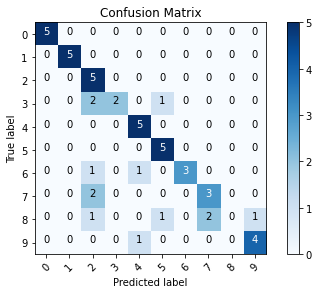

In [17]:
cm_plot_labels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')